In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
draft_picks = pd.read_csv("draft_picks.csv")
first_rounders = draft_picks[draft_picks['round'] == 1]
first_rounders

,season,team,round,pick,pfr_id,pfr_name,player_id,side,category,position
0,1980,DET,1,1,SimsBi00,Billy Sims,NaN,O,RB,RB
1,1980,NYJ,1,2,JoneLa00,Lam Jones,NaN,O,WR,WR
2,1980,CIN,1,3,MunoAn00,Anthony Munoz,NaN,O,OL,T
3,1980,GB,1,4,ClarBr23,Bruce Clark,NaN,D,DL,DE
4,1980,BAL,1,5,DickCu00,Curtis Dickey,NaN,O,RB,RB
5,1980,LARM,1,6,GreeCu21,Curtis Greer,NaN,D,DL,DE
6,1980,ATL,1,7,MillJu00,Junior Miller,NaN,O,TE,TE
7,1980,NYG,1,8,HaynMa00,Mark Haynes,NaN,D,DB,DB
8,1980,MIN,1,9,MartDo21,Doug Martin,NaN,D,DL,DE
9,1980,SEA,1,10,GreeJa01,Jacob Green,NaN,D,DL,DE


In [5]:
multiple_picks = first_rounders.groupby(["team","season"], as_index=False).count()
multiple_picks = multiple_picks[multiple_picks["pick"]>1]

In [6]:
multiple_pick_seasons = list(multiple_picks["season"])
multiple_pick_seasons_sorted = sorted(multiple_pick_seasons)
multiple_pick_seasons_sorted = set(multiple_pick_seasons_sorted)
multiple_pick_seasons_sorted

{1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021}

In [24]:
first_round_2_picks = first_rounders.query('season in @multiple_pick_seasons_sorted')

In [25]:
first_round_2_picks.sort_values(by=['season','team']).to_csv("multiple_1st_drafts.csv")

/Users/chrismoranda/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


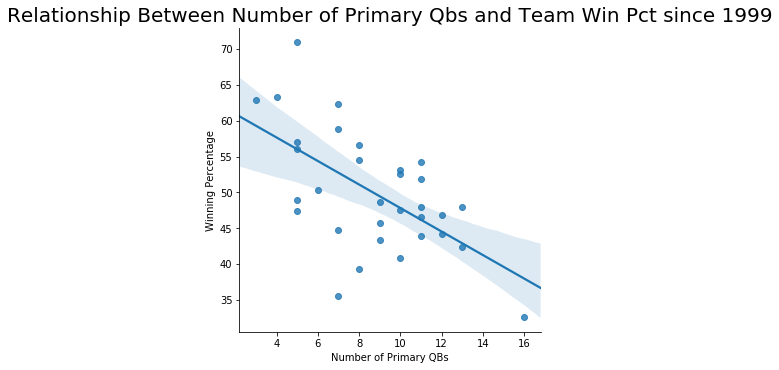

In [7]:
#How important is it to find a franchise QB?
import seaborn as sns
import statsmodels.formula.api as sm

num_qbs_vs_win_pct = pd.read_csv("Num_QBs_Win_Pct.csv")

sns.lmplot(x='NumQbs', y='WinPct',  data=num_qbs_vs_win_pct)
plt.xlabel('Number of Primary QBs')
plt.ylabel('Winning Percentage')
plt.title("Relationship Between Number of Primary Qbs and Team Win Pct since 1999", fontsize=20)

In [27]:
reg1 = sm.ols(formula = 'WinPct ~ NumQbs', data= num_qbs_vs_win_pct).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 WinPct   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     16.62
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           0.000309
Time:                        22:13:55   Log-Likelihood:                -105.84
No. Observations:                  32   AIC:                             215.7
Df Residuals:                      30   BIC:                             218.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.1983      3.692     17.389      0.0

In [28]:
away_games_qbs = pd.read_csv("away_game_qbs.csv")
home_games_qbs = pd.read_csv("home_game_qbs.csv")

In [29]:
home_games_qbs = home_games_qbs[["season","team1","qb1","date","playoff"]]

In [30]:
away_games_qbs = away_games_qbs[["season","team2","qb2","date","playoff"]]
away_games_qbs = away_games_qbs.rename(columns={'team2':'team1', 'qb2':'qb1'})
away_games_qbs

,season,team1,qb1,date,playoff
0,1966,ARI,Charley Johnson,4,0
1,1966,ARI,Terry Nofsinger,3,0
2,1966,ATL,Dennis Claridge,2,0
3,1966,ATL,Randy Johnson,5,0
4,1966,BUF,Jack Kemp,7,0
5,1966,CHI,Rudy Bukich,7,0
6,1966,CLE,Frank Ryan,7,0
7,1966,DAL,Don Meredith,6,0
8,1966,DAL,Jerry Rhome,1,0
9,1966,DEN,John McCormick,2,0


In [31]:
all_games_qbs = home_games_qbs.append(away_games_qbs)

In [32]:
all_games_qbs.sort_values(by = ['season', 'team1', 'qb1'])

,season,team1,qb1,date,playoff
0,1966,ARI,Charley Johnson,5,0
0,1966,ARI,Charley Johnson,4,0
1,1966,ARI,Terry Nofsinger,2,0
1,1966,ARI,Terry Nofsinger,3,0
2,1966,ATL,Dennis Claridge,1,0
2,1966,ATL,Dennis Claridge,2,0
3,1966,ATL,Randy Johnson,6,0
3,1966,ATL,Randy Johnson,5,0
4,1966,BUF,Jack Kemp,8,1
4,1966,BUF,Jack Kemp,7,0


In [33]:
all_games_qbs_sum = all_games_qbs.groupby(['season', 'team1', 'qb1']).sum()

In [34]:
#all_games_qbs_sum.to_csv("QBS_Total.csv")

In [35]:
#primary_qbs = all_games_qbs_sum.groupby(['season', 'team1'])['date'].max().reset_index()
primary_qbs = all_games_qbs_sum.loc[all_games_qbs_sum.groupby(['season', 'team1'])['date'].idxmax()]

In [37]:
primary_qbs.to_csv("Primary_Qbs.csv")

In [38]:
sorted_qbs = pd.read_csv("Primary_Qbs.csv")

In [41]:
sorted_qbs = sorted_qbs.sort_values(by = ['team1', 'season'])

In [69]:
from collections import Counter
qbs_66_75 = sorted_qbs[sorted_qbs['season'] < 1976]
dict_66_75 = {}
for index, row in qbs_66_75.iterrows():
    if row["team1"] in dict_66_75:
        dict_66_75[row["team1"]].append(row["qb1"])
    else:
        dict_66_75[row["team1"]] = []
        dict_66_75[row["team1"]].append(row["qb1"])
dict_66_75
numqbs_per_team_66_75 = {}
for key, values in dict_66_75.items():
    items = Counter(values).keys()
    numqbs_per_team_66_75[key] = len(items)
numqbs_per_team_66_75

{'ARI': 3,
 'ATL': 4,
 'BUF': 4,
 'CHI': 4,
 'CIN': 4,
 'CLE': 3,
 'DAL': 3,
 'DEN': 6,
 'DET': 4,
 'GB': 4,
 'IND': 4,
 'KC': 2,
 'LAC': 2,
 'LAR': 3,
 'MIA': 3,
 'MIN': 3,
 'NE': 5,
 'NO': 3,
 'NYG': 4,
 'NYJ': 3,
 'OAK': 3,
 'PHI': 4,
 'PIT': 4,
 'SF': 4,
 'TEN': 4,
 'WSH': 2}

In [70]:
qbs_76_85 = sorted_qbs[(sorted_qbs['season'] > 1975) & (sorted_qbs['season'] < 1986)]
dict_76_85 = {}
for index, row in qbs_76_85.iterrows():
    if row["team1"] in dict_76_85:
        dict_76_85[row["team1"]].append(row["qb1"])
    else:
        dict_76_85[row["team1"]] = []
        dict_76_85[row["team1"]].append(row["qb1"])
dict_76_85
numqbs_per_team_76_85 = {}
for key, values in dict_76_85.items():
    items = Counter(values).keys()
    numqbs_per_team_76_85[key] = len(items)
numqbs_per_team_76_85

{'ARI': 2,
 'ATL': 3,
 'BUF': 3,
 'CHI': 4,
 'CIN': 2,
 'CLE': 3,
 'DAL': 3,
 'DEN': 4,
 'DET': 4,
 'GB': 2,
 'IND': 4,
 'KC': 3,
 'LAC': 2,
 'LAR': 4,
 'MIA': 3,
 'MIN': 3,
 'NE': 3,
 'NO': 5,
 'NYG': 4,
 'NYJ': 5,
 'OAK': 3,
 'PHI': 2,
 'PIT': 3,
 'SEA': 2,
 'SF': 3,
 'TB': 5,
 'TEN': 5,
 'WSH': 2}

In [71]:
qbs_86_95 = sorted_qbs[(sorted_qbs['season'] > 1985) & (sorted_qbs['season'] < 1996)]
dict_86_95 = {}
for index, row in qbs_86_95.iterrows():
    if row["team1"] in dict_86_95:
        dict_86_95[row["team1"]].append(row["qb1"])
    else:
        dict_86_95[row["team1"]] = []
        dict_86_95[row["team1"]].append(row["qb1"])
dict_86_95
numqbs_per_team_86_95 = {}
for key, values in dict_86_95.items():
    items = Counter(values).keys()
    numqbs_per_team_86_95[key] = len(items)
numqbs_per_team_86_95

{'ARI': 8,
 'ATL': 5,
 'BUF': 1,
 'CAR': 1,
 'CHI': 5,
 'CIN': 3,
 'CLE': 3,
 'DAL': 3,
 'DEN': 1,
 'DET': 6,
 'GB': 3,
 'IND': 4,
 'JAX': 1,
 'KC': 6,
 'LAC': 6,
 'LAR': 2,
 'MIA': 2,
 'MIN': 5,
 'NE': 6,
 'NO': 5,
 'NYG': 3,
 'NYJ': 3,
 'OAK': 4,
 'PHI': 5,
 'PIT': 3,
 'SEA': 3,
 'SF': 2,
 'TB': 5,
 'TEN': 3,
 'WSH': 5}

In [72]:
qbs_96_05 = sorted_qbs[(sorted_qbs['season'] > 1995) & (sorted_qbs['season'] < 2006)]
dict_96_05 = {}
for index, row in qbs_96_05.iterrows():
    if row["team1"] in dict_96_05:
        dict_96_05[row["team1"]].append(row["qb1"])
    else:
        dict_96_05[row["team1"]] = []
        dict_96_05[row["team1"]].append(row["qb1"])
dict_96_05
numqbs_per_team_96_05 = {}
for key, values in dict_96_05.items():
    items = Counter(values).keys()
    numqbs_per_team_96_05[key] = len(items)
numqbs_per_team_96_05

{'ARI': 5,
 'ATL': 4,
 'BAL': 7,
 'BUF': 7,
 'CAR': 5,
 'CHI': 8,
 'CIN': 5,
 'CLE': 5,
 'DAL': 5,
 'DEN': 3,
 'DET': 3,
 'GB': 1,
 'HOU': 1,
 'IND': 2,
 'JAX': 2,
 'KC': 4,
 'LAC': 5,
 'LAR': 3,
 'MIA': 4,
 'MIN': 4,
 'NE': 2,
 'NO': 6,
 'NYG': 6,
 'NYJ': 6,
 'OAK': 5,
 'PHI': 4,
 'PIT': 4,
 'SEA': 4,
 'SF': 4,
 'TB': 5,
 'TEN': 3,
 'WSH': 7}

In [73]:
qbs_06_15 = sorted_qbs[(sorted_qbs['season'] > 2005) & (sorted_qbs['season'] < 2016)]
dict_06_15 = {}
for index, row in qbs_06_15.iterrows():
    if row["team1"] in dict_06_15:
        dict_06_15[row["team1"]].append(row["qb1"])
    else:
        dict_06_15[row["team1"]] = []
        dict_06_15[row["team1"]].append(row["qb1"])
dict_06_15
numqbs_per_team_06_15 = {}
for key, values in dict_06_15.items():
    items = Counter(values).keys()
    numqbs_per_team_06_15[key] = len(items)
numqbs_per_team_06_15

{'ARI': 7,
 'ATL': 3,
 'BAL': 3,
 'BUF': 6,
 'CAR': 4,
 'CHI': 3,
 'CIN': 3,
 'CLE': 8,
 'DAL': 3,
 'DEN': 5,
 'DET': 4,
 'GB': 2,
 'HOU': 5,
 'IND': 4,
 'JAX': 4,
 'KC': 6,
 'LAC': 1,
 'LAR': 5,
 'MIA': 6,
 'MIN': 6,
 'NE': 2,
 'NO': 1,
 'NYG': 1,
 'NYJ': 5,
 'OAK': 7,
 'PHI': 5,
 'PIT': 1,
 'SEA': 4,
 'SF': 4,
 'TB': 6,
 'TEN': 7,
 'WSH': 6}

In [74]:
qbs_16_21 = sorted_qbs[(sorted_qbs['season'] > 2015) & (sorted_qbs['season'] < 2022)]
dict_16_21 = {}
for index, row in qbs_16_21.iterrows():
    if row["team1"] in dict_16_21:
        dict_16_21[row["team1"]].append(row["qb1"])
    else:
        dict_16_21[row["team1"]] = []
        dict_16_21[row["team1"]].append(row["qb1"])
dict_16_21
numqbs_per_team_16_21 = {}
for key, values in dict_16_21.items():
    items = Counter(values).keys()
    numqbs_per_team_16_21[key] = len(items)
numqbs_per_team_16_21

{'ARI': 3,
 'ATL': 1,
 'BAL': 2,
 'BUF': 2,
 'CAR': 4,
 'CHI': 3,
 'CIN': 2,
 'CLE': 3,
 'DAL': 2,
 'DEN': 5,
 'DET': 2,
 'GB': 2,
 'HOU': 4,
 'IND': 4,
 'JAX': 3,
 'KC': 2,
 'LAC': 2,
 'LAR': 3,
 'MIA': 4,
 'MIN': 3,
 'NE': 3,
 'NO': 2,
 'NYG': 2,
 'NYJ': 4,
 'OAK': 1,
 'PHI': 2,
 'PIT': 2,
 'SEA': 1,
 'SF': 4,
 'TB': 2,
 'TEN': 2,
 'WSH': 4}

In [86]:
nfl_win_pct = pd.read_csv("NFL_WL_Records.csv")

In [87]:
sorted_win_pct = nfl_win_pct.sort_values(by = ['team', 'season'])

In [88]:
sorted_win_pct

,Unnamed: 0,season,team,wins,losses,ties,wp
16,16,1966,ARI,8,5,0.5,0.607143
43,43,1967,ARI,6,7,0.5,0.464286
73,73,1968,ARI,9,4,0.5,0.678571
86,86,1969,ARI,4,9,0.5,0.321429
102,102,1970,ARI,8,5,0.5,0.607143
145,145,1971,ARI,4,9,0.5,0.321429
154,154,1972,ARI,4,9,0.5,0.321429
190,190,1973,ARI,4,9,0.5,0.321429
219,219,1974,ARI,10,5,0.0,0.666667
249,249,1975,ARI,11,4,0.0,0.733333


In [99]:
wp_66_75 = sorted_win_pct[sorted_win_pct['season'] < 1976]
wp_66_75 = wp_66_75.groupby(['team']).sum()
wp_66_75['wp'] = (wp_66_75['wins'] + wp_66_75['ties'])/(wp_66_75['wins'] + wp_66_75['ties'] + wp_66_75['losses'] + wp_66_75['ties'])

In [101]:
wp_76_85 = sorted_win_pct[(sorted_win_pct['season'] > 1975) & (sorted_win_pct['season'] < 1986)]
wp_76_85 = wp_76_85.groupby(['team']).sum()
wp_76_85['wp'] = (wp_76_85['wins'] + wp_76_85['ties'])/(wp_76_85['wins'] + wp_76_85['ties'] + wp_76_85['losses'] + wp_76_85['ties'])

In [102]:
wp_86_95 = sorted_win_pct[(sorted_win_pct['season'] > 1985) & (sorted_win_pct['season'] < 1996)]
wp_86_95 = wp_86_95.groupby(['team']).sum()
wp_86_95['wp'] = (wp_86_95['wins'] + wp_86_95['ties'])/(wp_86_95['wins'] + wp_86_95['ties'] + wp_86_95['losses'] + wp_86_95['ties'])

In [103]:
wp_96_05 = sorted_win_pct[(sorted_win_pct['season'] > 1995) & (sorted_win_pct['season'] < 2006)]
wp_96_05 = wp_96_05.groupby(['team']).sum()
wp_96_05['wp'] = (wp_96_05['wins'] + wp_96_05['ties'])/(wp_96_05['wins'] + wp_96_05['ties'] + wp_96_05['losses'] + wp_96_05['ties'])

In [104]:
wp_06_15 = sorted_win_pct[(sorted_win_pct['season'] > 2005) & (sorted_win_pct['season'] < 2016)]
wp_06_15 = wp_06_15.groupby(['team']).sum()
wp_06_15['wp'] = (wp_06_15['wins'] + wp_06_15['ties'])/(wp_06_15['wins'] + wp_06_15['ties'] + wp_06_15['losses'] + wp_06_15['ties'])

In [105]:
wp_16_21 = sorted_win_pct[(sorted_win_pct['season'] > 2015) & (sorted_win_pct['season'] < 2022)]
wp_16_21 = wp_16_21.groupby(['team']).sum()
wp_16_21['wp'] = (wp_16_21['wins'] + wp_16_21['ties'])/(wp_16_21['wins'] + wp_16_21['ties'] + wp_16_21['losses'] + wp_16_21['ties'])

In [136]:
for row in wp_06_15.iterrows():
    print(row[0])

AttributeError: 'str' object has no attribute 'season'

In [145]:
wp_vs_qbnum_66_75 = pd.DataFrame(columns=['team', 'wpct', 'qbnum'])
for row in wp_66_75.iterrows():
    df_team = {'team': row[0], 'wpct': row[1].wp, 'qbnum': numqbs_per_team_66_75[row[0]]}
    print(df_team)
    wp_vs_qbnum_66_75 = wp_vs_qbnum_66_75.append(df_team, ignore_index = True)
wp_vs_qbnum_66_75.to_csv("66_75_qb_vs_wpct.csv")

{'team': 'ARI', 'wpct': 0.5070422535211268, 'qbnum': 3}
{'team': 'ATL', 'wpct': 0.34285714285714286, 'qbnum': 4}
{'team': 'BUF', 'wpct': 0.38028169014084506, 'qbnum': 4}
{'team': 'CHI', 'wpct': 0.35, 'qbnum': 4}
{'team': 'CIN', 'wpct': 0.4826086956521739, 'qbnum': 4}
{'team': 'CLE', 'wpct': 0.5544217687074829, 'qbnum': 3}
{'team': 'DAL', 'wpct': 0.7088607594936709, 'qbnum': 3}
{'team': 'DEN', 'wpct': 0.38571428571428573, 'qbnum': 6}
{'team': 'DET', 'wpct': 0.5070921985815603, 'qbnum': 4}
{'team': 'GB', 'wpct': 0.5342465753424658, 'qbnum': 4}
{'team': 'IND', 'wpct': 0.610738255033557, 'qbnum': 4}
{'team': 'KC', 'wpct': 0.6258503401360545, 'qbnum': 2}
{'team': 'LAC', 'wpct': 0.425, 'qbnum': 2}
{'team': 'LAR', 'wpct': 0.6938775510204082, 'qbnum': 3}
{'team': 'MIA', 'wpct': 0.6059602649006622, 'qbnum': 3}
{'team': 'MIN', 'wpct': 0.6470588235294118, 'qbnum': 3}
{'team': 'NE', 'wpct': 0.33214285714285713, 'qbnum': 5}
{'team': 'NO', 'wpct': 0.27380952380952384, 'qbnum': 3}
{'team': 'NYG', 'wp

In [146]:
wp_vs_qbnum_76_85 = pd.DataFrame(columns=['team', 'wpct', 'qbnum'])
for row in wp_76_85.iterrows():
    df_team = {'team': row[0], 'wpct': row[1].wp, 'qbnum': numqbs_per_team_76_85[row[0]]}
    print(df_team)
    wp_vs_qbnum_76_85 = wp_vs_qbnum_76_85.append(df_team, ignore_index = True)
wp_vs_qbnum_76_85.to_csv("76_85_qb_vs_wpct.csv")

{'team': 'ARI', 'wpct': 0.45, 'qbnum': 2}
{'team': 'ATL', 'wpct': 0.43137254901960786, 'qbnum': 3}
{'team': 'BUF', 'wpct': 0.3618421052631579, 'qbnum': 3}
{'team': 'CHI', 'wpct': 0.5512820512820513, 'qbnum': 4}
{'team': 'CIN', 'wpct': 0.49019607843137253, 'qbnum': 2}
{'team': 'CLE', 'wpct': 0.4868421052631579, 'qbnum': 3}
{'team': 'DAL', 'wpct': 0.7005988023952096, 'qbnum': 3}
{'team': 'DEN', 'wpct': 0.6153846153846154, 'qbnum': 4}
{'team': 'DET', 'wpct': 0.4139072847682119, 'qbnum': 4}
{'team': 'GB', 'wpct': 0.44039735099337746, 'qbnum': 2}
{'team': 'IND', 'wpct': 0.3741721854304636, 'qbnum': 4}
{'team': 'KC', 'wpct': 0.38926174496644295, 'qbnum': 3}
{'team': 'LAC', 'wpct': 0.5448717948717948, 'qbnum': 2}
{'team': 'LAR', 'wpct': 0.5920245398773006, 'qbnum': 4}
{'team': 'MIA', 'wpct': 0.6635802469135802, 'qbnum': 3}
{'team': 'MIN', 'wpct': 0.5, 'qbnum': 3}
{'team': 'NE', 'wpct': 0.5641025641025641, 'qbnum': 3}
{'team': 'NO', 'wpct': 0.3422818791946309, 'qbnum': 5}
{'team': 'NYG', 'wpct

In [147]:
wp_vs_qbnum_86_95 = pd.DataFrame(columns=['team', 'wpct', 'qbnum'])
for row in wp_86_95.iterrows():
    df_team = {'team': row[0], 'wpct': row[1].wp, 'qbnum': numqbs_per_team_86_95[row[0]]}
    print(df_team)
    wp_vs_qbnum_86_95 = wp_vs_qbnum_86_95.append(df_team, ignore_index = True)
wp_vs_qbnum_86_95.to_csv("86_95_qb_vs_wpct.csv")

{'team': 'ARI', 'wpct': 0.3490566037735849, 'qbnum': 8}
{'team': 'ATL', 'wpct': 0.38580246913580246, 'qbnum': 5}
{'team': 'BUF', 'wpct': 0.615819209039548, 'qbnum': 1}
{'team': 'CAR', 'wpct': 0.4375, 'qbnum': 1}
{'team': 'CHI', 'wpct': 0.5833333333333334, 'qbnum': 5}
{'team': 'CIN', 'wpct': 0.40853658536585363, 'qbnum': 3}
{'team': 'CLE', 'wpct': 0.5029761904761905, 'qbnum': 3}
{'team': 'DAL', 'wpct': 0.5581395348837209, 'qbnum': 3}
{'team': 'DEN', 'wpct': 0.564327485380117, 'qbnum': 1}
{'team': 'DET', 'wpct': 0.4451219512195122, 'qbnum': 6}
{'team': 'GB', 'wpct': 0.45481927710843373, 'qbnum': 3}
{'team': 'IND', 'wpct': 0.4233128834355828, 'qbnum': 4}
{'team': 'JAX', 'wpct': 0.25, 'qbnum': 1}
{'team': 'KC', 'wpct': 0.5562130177514792, 'qbnum': 6}
{'team': 'LAC', 'wpct': 0.46060606060606063, 'qbnum': 6}
{'team': 'LAR', 'wpct': 0.42073170731707316, 'qbnum': 2}
{'team': 'MIA', 'wpct': 0.5542168674698795, 'qbnum': 2}
{'team': 'MIN', 'wpct': 0.5535714285714286, 'qbnum': 5}
{'team': 'NE', 'w

In [148]:
wp_vs_qbnum_96_05 = pd.DataFrame(columns=['team', 'wpct', 'qbnum'])
for row in wp_96_05.iterrows():
    df_team = {'team': row[0], 'wpct': row[1].wp, 'qbnum': numqbs_per_team_96_05[row[0]]}
    print(df_team)
    wp_vs_qbnum_96_05 = wp_vs_qbnum_96_05.append(df_team, ignore_index = True)
wp_vs_qbnum_96_05.to_csv("96_05_qb_vs_wpct.csv")

{'team': 'ARI', 'wpct': 0.35185185185185186, 'qbnum': 5}
{'team': 'ATL', 'wpct': 0.46407185628742514, 'qbnum': 4}
{'team': 'BAL', 'wpct': 0.5, 'qbnum': 7}
{'team': 'BUF', 'wpct': 0.4662576687116564, 'qbnum': 7}
{'team': 'CAR', 'wpct': 0.47928994082840237, 'qbnum': 5}
{'team': 'CHI', 'wpct': 0.4074074074074074, 'qbnum': 8}
{'team': 'CIN', 'wpct': 0.37888198757763975, 'qbnum': 5}
{'team': 'CLE', 'wpct': 0.3185840707964602, 'qbnum': 5}
{'team': 'DAL', 'wpct': 0.45454545454545453, 'qbnum': 5}
{'team': 'DEN', 'wpct': 0.6589595375722543, 'qbnum': 3}
{'team': 'DET', 'wpct': 0.35185185185185186, 'qbnum': 3}
{'team': 'GB', 'wpct': 0.630057803468208, 'qbnum': 1}
{'team': 'HOU', 'wpct': 0.28125, 'qbnum': 1}
{'team': 'IND', 'wpct': 0.5588235294117647, 'qbnum': 2}
{'team': 'JAX', 'wpct': 0.5562130177514792, 'qbnum': 2}
{'team': 'KC', 'wpct': 0.5493827160493827, 'qbnum': 4}
{'team': 'LAC', 'wpct': 0.39751552795031053, 'qbnum': 5}
{'team': 'LAR', 'wpct': 0.5352941176470588, 'qbnum': 3}
{'team': 'MIA'

In [149]:
wp_vs_qbnum_06_15 = pd.DataFrame(columns=['team', 'wpct', 'qbnum'])
for row in wp_06_15.iterrows():
    df_team = {'team': row[0], 'wpct': row[1].wp, 'qbnum': numqbs_per_team_06_15[row[0]]}
    print(df_team)
    wp_vs_qbnum_06_15 = wp_vs_qbnum_06_15.append(df_team, ignore_index = True)
wp_vs_qbnum_06_15.to_csv("06_15_qb_vs_wpct.csv")

{'team': 'ARI', 'wpct': 0.5266272189349113, 'qbnum': 7}
{'team': 'ATL', 'wpct': 0.5212121212121212, 'qbnum': 3}
{'team': 'BAL', 'wpct': 0.5965909090909091, 'qbnum': 3}
{'team': 'BUF', 'wpct': 0.4125, 'qbnum': 6}
{'team': 'CAR', 'wpct': 0.5239520958083832, 'qbnum': 4}
{'team': 'CHI', 'wpct': 0.5272727272727272, 'qbnum': 3}
{'team': 'CIN', 'wpct': 0.5180722891566265, 'qbnum': 3}
{'team': 'CLE', 'wpct': 0.31875, 'qbnum': 8}
{'team': 'DAL', 'wpct': 0.5421686746987951, 'qbnum': 3}
{'team': 'DEN', 'wpct': 0.5882352941176471, 'qbnum': 5}
{'team': 'DET', 'wpct': 0.35185185185185186, 'qbnum': 4}
{'team': 'GB', 'wpct': 0.6428571428571429, 'qbnum': 2}
{'team': 'HOU', 'wpct': 0.4909090909090909, 'qbnum': 5}
{'team': 'IND', 'wpct': 0.6420454545454546, 'qbnum': 4}
{'team': 'JAX', 'wpct': 0.36419753086419754, 'qbnum': 4}
{'team': 'KC', 'wpct': 0.42424242424242425, 'qbnum': 6}
{'team': 'LAC', 'wpct': 0.5680473372781065, 'qbnum': 1}
{'team': 'LAR', 'wpct': 0.315625, 'qbnum': 5}
{'team': 'MIA', 'wpct': 

In [151]:
wp_vs_qbnum_16_21 = pd.DataFrame(columns=['team', 'wpct', 'qbnum'])
for row in wp_16_21.iterrows():
    df_team = {'team': row[0], 'wpct': row[1].wp, 'qbnum': numqbs_per_team_16_21[row[0]]}
    print(df_team)
    wp_vs_qbnum_16_21 = wp_vs_qbnum_16_21.append(df_team, ignore_index = True)
wp_vs_qbnum_16_21.to_csv("16_21_qb_vs_wpct.csv")

{'team': 'ARI', 'wpct': 0.4387755102040816, 'qbnum': 3}
{'team': 'ATL', 'wpct': 0.4803921568627451, 'qbnum': 1}
{'team': 'BAL', 'wpct': 0.6039603960396039, 'qbnum': 2}
{'team': 'BUF', 'wpct': 0.5673076923076923, 'qbnum': 2}
{'team': 'CAR', 'wpct': 0.3979591836734694, 'qbnum': 4}
{'team': 'CHI', 'wpct': 0.42424242424242425, 'qbnum': 3}
{'team': 'CIN', 'wpct': 0.38613861386138615, 'qbnum': 2}
{'team': 'CLE', 'wpct': 0.3484848484848485, 'qbnum': 3}
{'team': 'DAL', 'wpct': 0.5841584158415841, 'qbnum': 2}
{'team': 'DEN', 'wpct': 0.4020618556701031, 'qbnum': 5}
{'team': 'DET', 'wpct': 0.3673469387755102, 'qbnum': 2}
{'team': 'GB', 'wpct': 0.6333333333333333, 'qbnum': 2}
{'team': 'HOU', 'wpct': 0.43137254901960786, 'qbnum': 4}
{'team': 'IND', 'wpct': 0.5, 'qbnum': 4}
{'team': 'JAX', 'wpct': 0.3, 'qbnum': 3}
{'team': 'KC', 'wpct': 0.7272727272727273, 'qbnum': 2}
{'team': 'LAC', 'wpct': 0.48484848484848486, 'qbnum': 2}
{'team': 'LAR', 'wpct': 0.616822429906542, 'qbnum': 3}
{'team': 'MIA', 'wpct

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

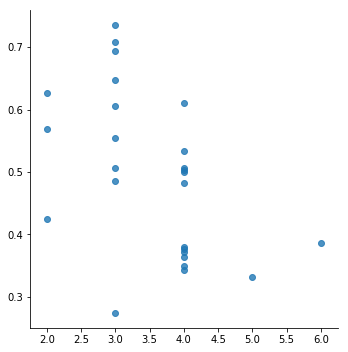

In [164]:
#How important is it to find a franchise QB?
sns.lmplot(x='qbnum', y='wpct',  data=wp_vs_qbnum_66_75)
#plt.xlabel('Number of Primary QBs')
#plt.ylabel('Winning Percentage')
#plt.title("Relationship Between Number of Primary Qbs and Team Win Pct from 1966-1975", fontsize=20)

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

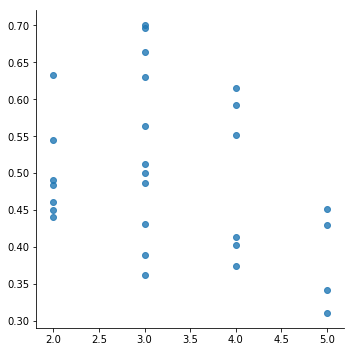

In [165]:
sns.lmplot(x='qbnum', y='wpct',  data=wp_vs_qbnum_76_85)

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

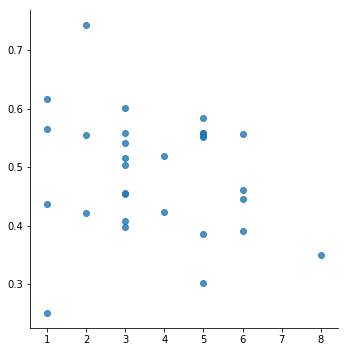

In [166]:
sns.lmplot(x='qbnum', y='wpct',  data=wp_vs_qbnum_86_95)

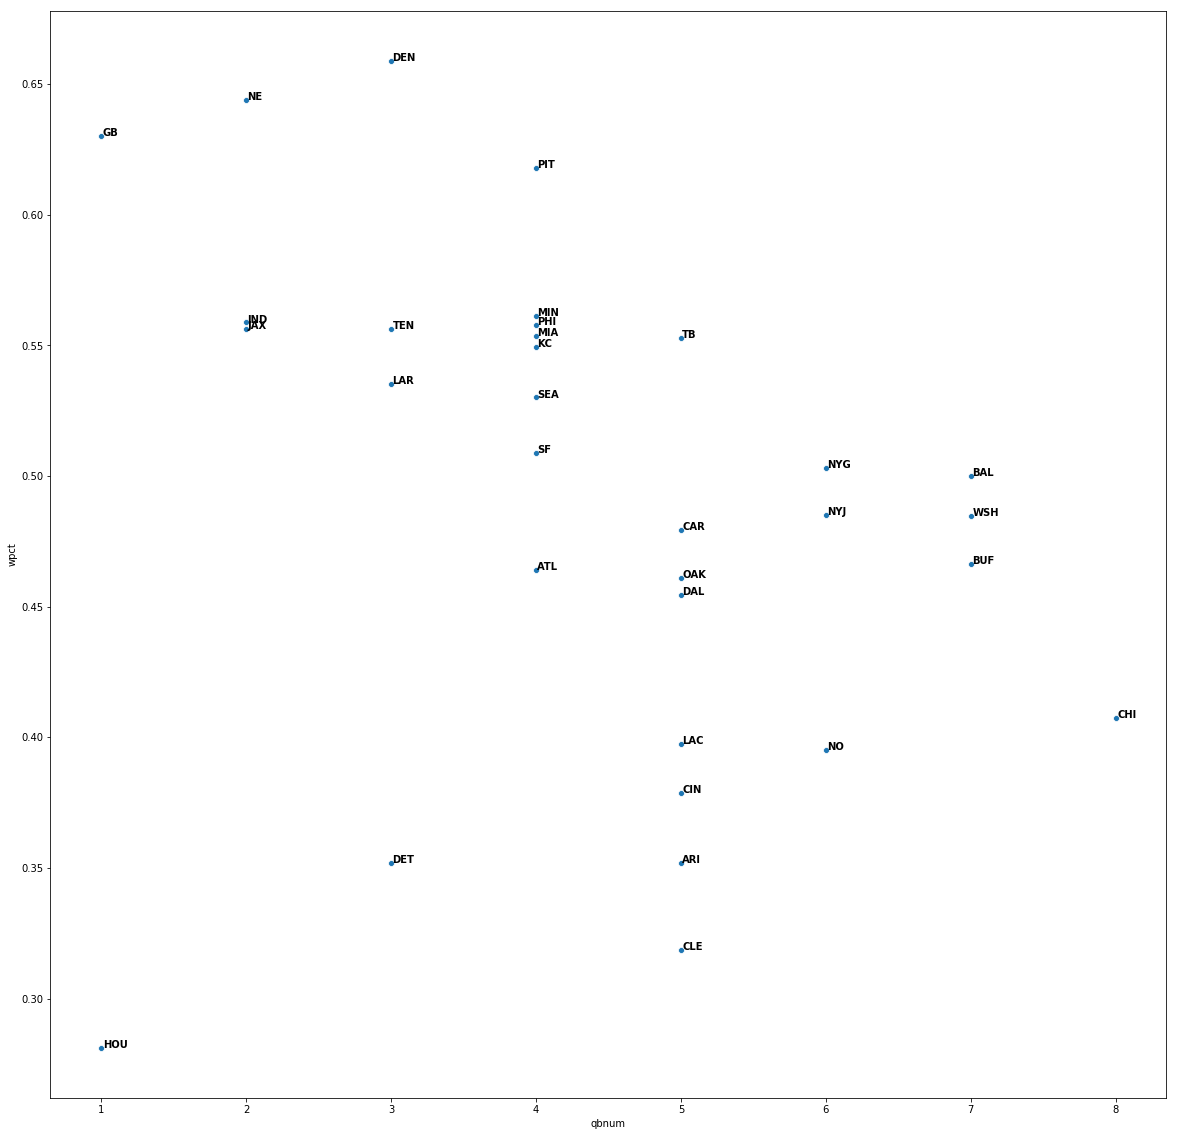

In [174]:
plt.figure(figsize=(20,20))
p1 = sns.scatterplot(x='qbnum', y='wpct',  data=wp_vs_qbnum_96_05)
for line in range(0,wp_vs_qbnum_96_05.shape[0]):
     p1.text(wp_vs_qbnum_96_05.qbnum[line]+0.01, wp_vs_qbnum_96_05.wpct[line], 
     wp_vs_qbnum_96_05.team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

In [1]:
plt.figure(figsize=(20,20))
p1 = sns.scatterplot(x='qbnum', y='wpct',  data=wp_vs_qbnum_66_75)
for line in range(0,wp_vs_qbnum_66_75.shape[0]):
     p1.text(wp_vs_qbnum_66_75.qbnum[line]+0.01, wp_vs_qbnum_66_75.wpct[line], 
     wp_vs_qbnum_66_75.team[line], horizontalalignment='left', 
     size='medium', color='black', weight='semibold')

NameError: name 'plt' is not defined

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

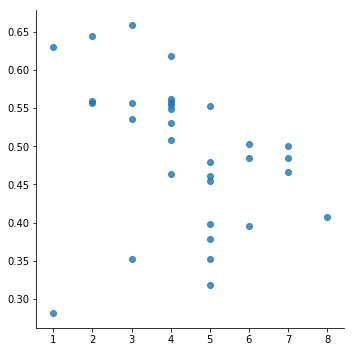

In [176]:
sns.lmplot(x='qbnum', y='wpct',  data=wp_vs_qbnum_96_05)
plt.xlabel('Number of Primary QBs')
plt.ylabel('Winning Percentage')
plt.title("Relationship Between Number of Primary Qbs and Team Win Pct between 1996 and 2005", fontsize=20)

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

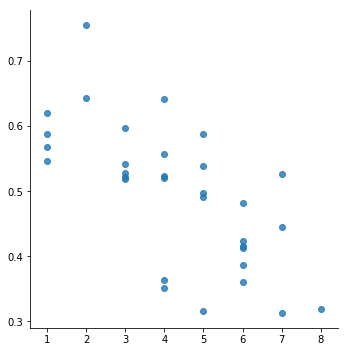

In [168]:
sns.lmplot(x='qbnum', y='wpct',  data=wp_vs_qbnum_06_15)

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s

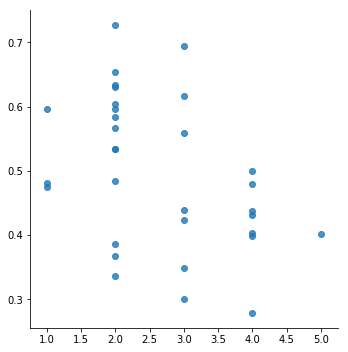

In [169]:
sns.lmplot(x='qbnum', y='wpct',  data=wp_vs_qbnum_16_21)